# Pymaceuticals Inc.
---

### Analysis
The purpose of this study was to compare the performance of Pymaceuticals' Capomulin with the other treatment regimens for the reduction of mice tumors.  There were 249 mice observed over 45 days treated in this study with various drug regimens.  The study resulted with a correlation coefficient of 0.84 between mouse weight and average tumor volume for the Capomulin regimen. That correlation coefficent shows that there is a positive correlation between mouse weight and average tumor volume within the Capomulin treatment group.  The conclusion is that Capomulin would be an effective treatment to reduce tumor volume in mice.



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_df = pd.merge(study_results, mouse_metadata, on = ["Mouse ID"], how = "left")

# Display the data table for preview
column_order = ['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']
print(data_df[column_order].head())

  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25  


In [2]:
# Checking the number of mice.
num_mice = data_df['Mouse ID'].nunique()
print("# of mice:", num_mice)

# of mice: 249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ID = data_df.loc[data_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mouse_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
#duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()
#duplicate_mouse_data = data_df[data_df['Mouse ID'].isin(duplicate_mouse_ids)]
#print("All data for duplicate Mouse IDs:")
#print(duplicate_mouse_data[column_order].head())

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = data_df[data_df['Mouse ID'].isin(duplicate_mouse_ID)== False]
clean_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_data_df["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
summary_df = data_df.groupby('Drug Regimen')
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = summary_df['Tumor Volume (mm3)'].mean()
tumor_median = summary_df['Tumor Volume (mm3)'].median()
tumor_std = summary_df['Tumor Volume (mm3)'].std()
tumor_sem = summary_df['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary DataFrame.
summary_groupedby_df = pd.DataFrame({
    'Mean': tumor_mean,
    'Median': tumor_median,
    'Standard Deviation': tumor_std,
    'SEM': tumor_sem
})
summary_groupedby_df.head()


,Mean,Median,Standard Deviation,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_groupedby_df = data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var','std', 'sem'])
# Using the aggregation method, produce the same summary statistics in a single line
summary_groupedby_df.columns = ['Mean', 'Median', 'Variance','Standard Deviation', 'SEM']
print(summary_groupedby_df)


                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.322552  50.854632  42.351070            6.507770  0.512884
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse TimePoints')

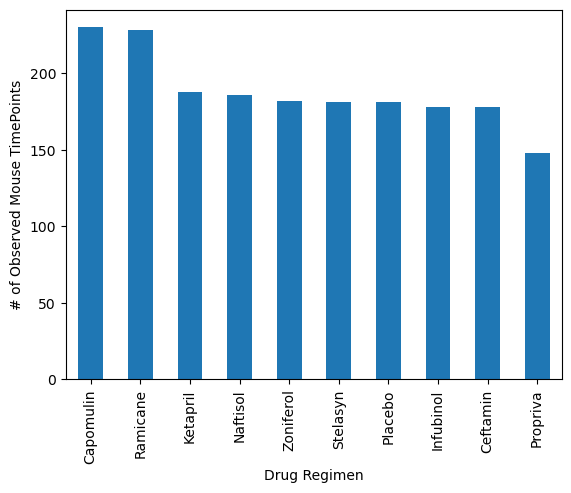

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_plot = clean_data_df['Drug Regimen'].value_counts().plot.bar()
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("# of Observed Mouse TimePoints")


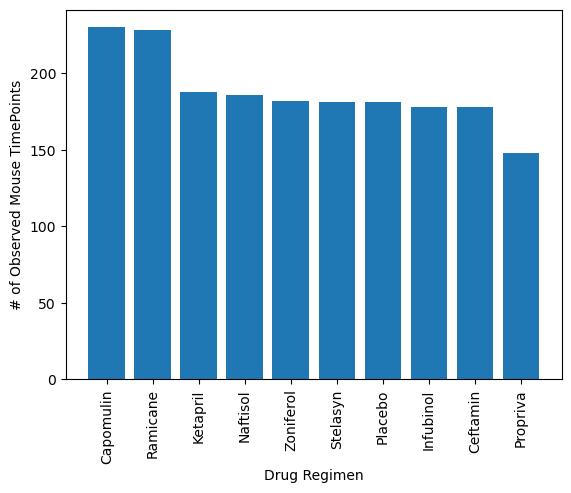

In [10]:
import numpy as np
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
counts = clean_data_df['Drug Regimen'].value_counts()
x_axis = np.arange(len(counts))
drug_regimens = counts.index
plt.bar(x_axis, counts)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse TimePoints")
plt.xticks(x_axis, drug_regimens, rotation='vertical')
plt.show()

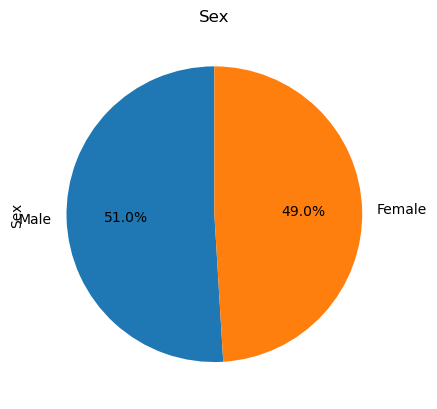

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
data = clean_data_df['Sex'].value_counts()
pie_plot = data.plot.pie(autopct="%1.1f%%",startangle=90, title='Sex')


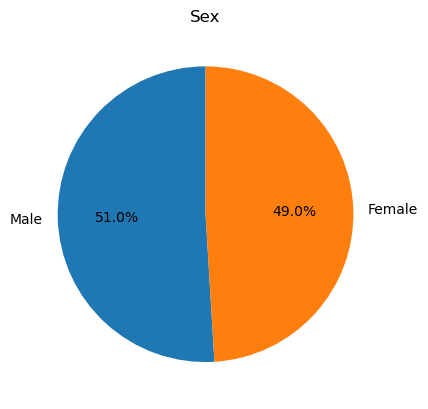

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
data = clean_data_df['Sex'].value_counts()
plt.pie(data, labels=data.index.values, autopct="%1.1f%%", startangle = 90)
plt.title('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

drug_values = []
# Start by getting the last (greatest) timepoint for each mouse
max_tp_df = clean_data_df.groupby(["Mouse ID"])['Timepoint'].max()
max_tp_df = max_tp_df.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = max_tp_df.merge(clean_data_df, on = ['Mouse ID','Timepoint'],how = 'left')


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
selected_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in selected_drugs:
    # Locate mice and get tumor volumes
    temp_df = merged_df.loc[merged_df['Drug Regimen'] == drug, "Tumor Volume (mm3)"]
    # Append tumor data to list for plotting
    tumor_vol_data.append(temp_df)
    
    quartiles = temp_df.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq-(1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers_count = temp_df.loc[(temp_df < lower_bound) | (temp_df > upper_bound)]
    
    #print outliers
    print(f"{drug}'s potential outliers: {outliers_count} ")
     
    
    
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64) 
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64) 
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64 
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64) 


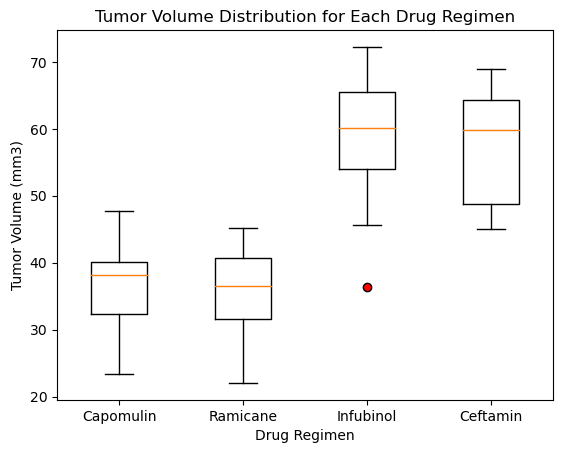

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=selected_drugs, flierprops={'marker': 'o', 'markerfacecolor': 'red'})
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume Distribution for Each Drug Regimen')
plt.show()

## Line and Scatter Plots

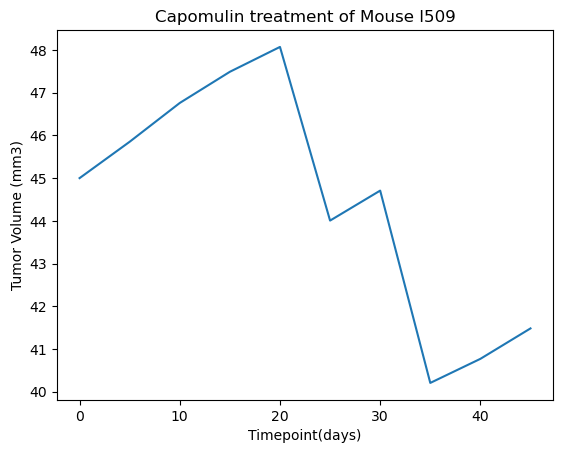

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse = clean_data_df.loc[clean_data_df['Mouse ID']=='l509',:]
x_axis = mouse['Timepoint']
y_axis = mouse['Tumor Volume (mm3)']
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Capomulin treatment of Mouse l509")
plt.plot(x_axis, y_axis)
plt.show()


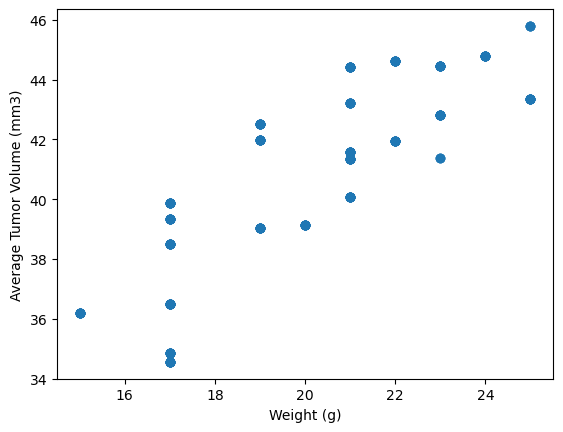

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = data_df.loc[data_df['Drug Regimen'] == 'Capomulin']
ave_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)':'avg_tumor_vol'})
merged_ave_df = pd.merge(capomulin_df, ave_vol_df, on='Mouse ID')
plt.scatter(merged_ave_df['Weight (g)'], merged_ave_df['avg_tumor_vol'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

In [18]:
print(merged_ave_df.columns)

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)', 'avg_tumor_vol'],
      dtype='object')


## Correlation and Regression

In [19]:
# Calculate the correlation coefficient 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_df = clean_data_df.loc[clean_data_df['Drug Regimen'] =='Capomulin']
capomulin_average = capomulin_df.groupby(['Mouse ID']).mean()
corr=round(st.pearsonr(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is: {corr}")



The correlation between mouse weight and the average tumor volume is: 0.84


C:\Users\Eldiscala\AppData\Local\Temp\ipykernel_10340\820901507.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capomulin_average = capomulin_df.groupby(['Mouse ID']).mean()


In [20]:
#Calculate linear regresssion
slope, intercept, r_value, p_value, std_err = st.linregress(capomulin_df['Weight (g)'], capomulin_df['Tumor Volume (mm3)'])

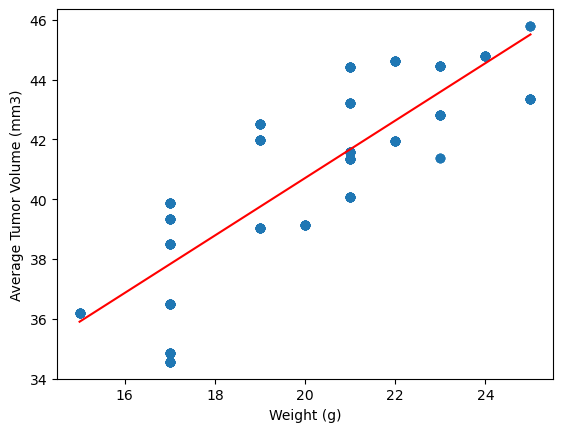

In [21]:
#create x-values for regresson
x_values = np.linspace(capomulin_df['Weight (g)'].min(), capomulin_df['Weight (g)'].max(), 100)

#create y-values for regression
y_values = slope * x_values + intercept

#Plot linear regression on top of scatter plot#
plt.scatter(merged_ave_df['Weight (g)'], merged_ave_df['avg_tumor_vol'])
plt.plot(x_values, y_values, 'r', label='Linear Regression')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()





